In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

In [3]:
def show(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
def imread(image):
    image = cv2.imread(image)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return image

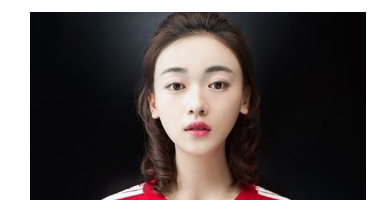

In [4]:
image = imread('face.png')
show(image)

- image：input images
- scaleFactor=1.1：the ratio to enlarge scale of area for detection, 10 % for ever timme
- minNeighbors=3：Required to match the number of rectangular boxes around each matched to the characteristics of the region is a rectangle, only more rectangular boxes exist at the same time, be considered to match, such as the face, the default value is 3.

- minSize：Minimum area for detection
- flags=0：
      - CASCADE_DO_CANNY_PRUNING=1, Using canny edge detection to exclude areas
      - CASCADE_SCALE_IMAGE=2, normal ratio detection 
      - CASCADE_FIND_BIGGEST_OBJECT=4, only detect biggest object in an image
      - CASCADE_DO_ROUGH_SEARCH=8 , rough detection

In [5]:
# Cascade Classification
# read a xml file containing features like eyes, nodes that can be classify to be a face
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [7]:
rects ### (164,41) - 180 width, -180 height

array([[164,  41, 180, 180]], dtype=int32)

In [ ]:
for (x,y,w,h) in rects:
    # 画矩形框
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)
    
show(image)

In [11]:
def facedetect(image):
    image = imread(image)
    # 级联分类器
    detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    rects = detector.detectMultiScale(image, scaleFactor=1.1, minNeighbors=2, minSize=(5, 5), flags=cv2.CASCADE_SCALE_IMAGE)

    for (x,y,w,h) in rects:
        # 画矩形框
        cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,0), 2)

    show(image)

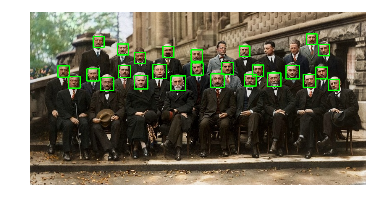

In [12]:
facedetect('Solvay.jpg')